#Classification problem Amacrine vs. the rest

In [56]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error, accuracy_score, ConfusionMatrixDisplay, multilabel_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder


import statsmodels.api as stats

# These are added for the regsubset implementation
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


#from regsubset import OLS, exhaustive_search, forward_search, backward_search
%matplotlib inline
plt.style.use('seaborn-white')
%matplotlib inline

In [112]:
#get the data
!git clone https://git.wur.nl/dijk097/ml2022_projectmbf.git data
#read csvfile
data = pd.read_csv('data/data_labeled_fixed.csv')
#remove - in name
data.columns = data.columns.str.replace("-", "")
dataweek1=data.drop(data.columns[-2],axis=1)


fatal: destination path 'data' already exists and is not an empty directory.


In [113]:
dataweek1["Amacrine"]=np.where(dataweek1['CLASS'] =="Amacrine", 1, 0)
x = dataweek1.drop(["CLASS"],axis=1)
x = x[x.columns[x.mean() > 2]]
x["Amacrine"]=dataweek1["Amacrine"]


##Method 1: decision tree

In [ ]:
x

,Anp32a,Aplp2,Atp2b1,Calm1,Ckb,Gng13,Hnrnpa2b1,Luc7l3,Malat1,Meg3,...,Scg2,Slc25a4,Syt1,Trpm1,Ttyh1,mtCytb,mtNd1,mtNd5,mtRnr2,Amacrine
0,2,4,2,2,4,2,2,9,60,0,...,7,0,4,10,3,12,3,4,25,0
1,4,1,0,2,5,2,3,2,73,2,...,0,8,5,0,4,5,1,1,16,0
2,0,9,2,8,2,7,0,2,39,4,...,12,5,3,5,3,12,5,4,14,0
3,1,1,11,8,4,0,2,3,41,6,...,12,1,2,0,1,8,1,1,7,0
4,4,3,8,6,4,7,1,4,24,1,...,0,7,1,1,5,17,7,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3719,0,0,1,5,0,4,1,0,6,0,...,1,1,1,3,1,2,4,0,4,0
3720,1,0,6,2,0,1,0,0,4,6,...,0,1,4,5,2,0,3,1,2,0
3721,3,2,0,4,1,0,0,0,10,1,...,0,1,3,4,1,2,0,1,4,0
3722,1,2,0,13,1,1,0,1,5,0,...,5,4,2,1,1,1,2,4,5,0


In [114]:
list(x.columns)

['Anp32a',
 'Aplp2',
 'Atp2b1',
 'Calm1',
 'Ckb',
 'Gng13',
 'Hnrnpa2b1',
 'Luc7l3',
 'Malat1',
 'Meg3',
 'Mgarp',
 'Pcp2',
 'Pcp4',
 'Scg2',
 'Slc25a4',
 'Syt1',
 'Trpm1',
 'Ttyh1',
 'mtCytb',
 'mtNd1',
 'mtNd5',
 'mtRnr2',
 'Amacrine']

In [115]:
X=x[list(x.columns)[:-1]]
y=x.Amacrine

In [116]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 

In [117]:
# Lets first create a decision tree classifier
dt = DecisionTreeClassifier(random_state=0)
# Here is the hyperparameter space
hyperparameters = {'max_leaf_nodes': range(5,100)}

dt_cv = GridSearchCV(dt, hyperparameters,
                     cv= 10,
                     verbose = True)
# Execute the exhastive search
dt_cv.fit(X_train, y_train)

print("Best hyperparameters", dt_cv.best_params_)
print("Best score",  dt_cv.best_score_)

Fitting 10 folds for each of 95 candidates, totalling 950 fits
Best hyperparameters {'max_leaf_nodes': 11}
Best score 0.9677816180235534


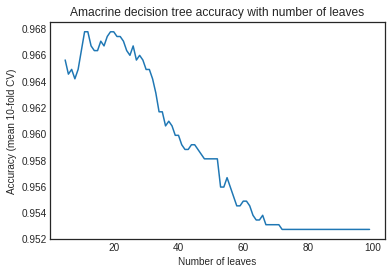

In [118]:
plt.figure()
sns.lineplot(y= dt_cv.cv_results_["mean_test_score"], x=dt_cv.cv_results_['param_max_leaf_nodes'].data)
plt.xlabel("Number of leaves")
plt.ylabel("Accuracy (mean 10-fold CV)")
plt.title("Amacrine decision tree accuracy with number of leaves")
plt.show()


the best hyperparameters is 'max_leaf_nodes': 11, so we build the tree with that




Train/test accuracy: 0.9781596849266022/0.9699248120300752


Text(0.5, 1.0, 'Amacrine decision tree confusion matrix with best parameters')

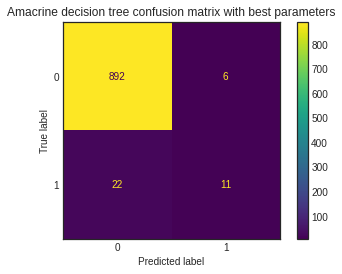

In [119]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(max_leaf_nodes=11,random_state=0)
# Train with the training dataset
dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)

print("Train/test accuracy: {}/{}".format(
      accuracy_score(dtc.predict(X_train),y_train),
      accuracy_score(dtc.predict(X_test),y_test),))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title("Amacrine decision tree confusion matrix with best parameters")

In [120]:
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("R^2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred, squared=False))

MAPE 29024272571668.094
R^2 0.12033475062428312
MAE 0.03007518796992481
RMSE 0.173421993904824


In [121]:
# Print the depth of the tree
print("The tree depth is", dtc.get_depth())
print("The tree has", dtc.get_n_leaves(), "leaves")

The tree depth is 6
The tree has 11 leaves


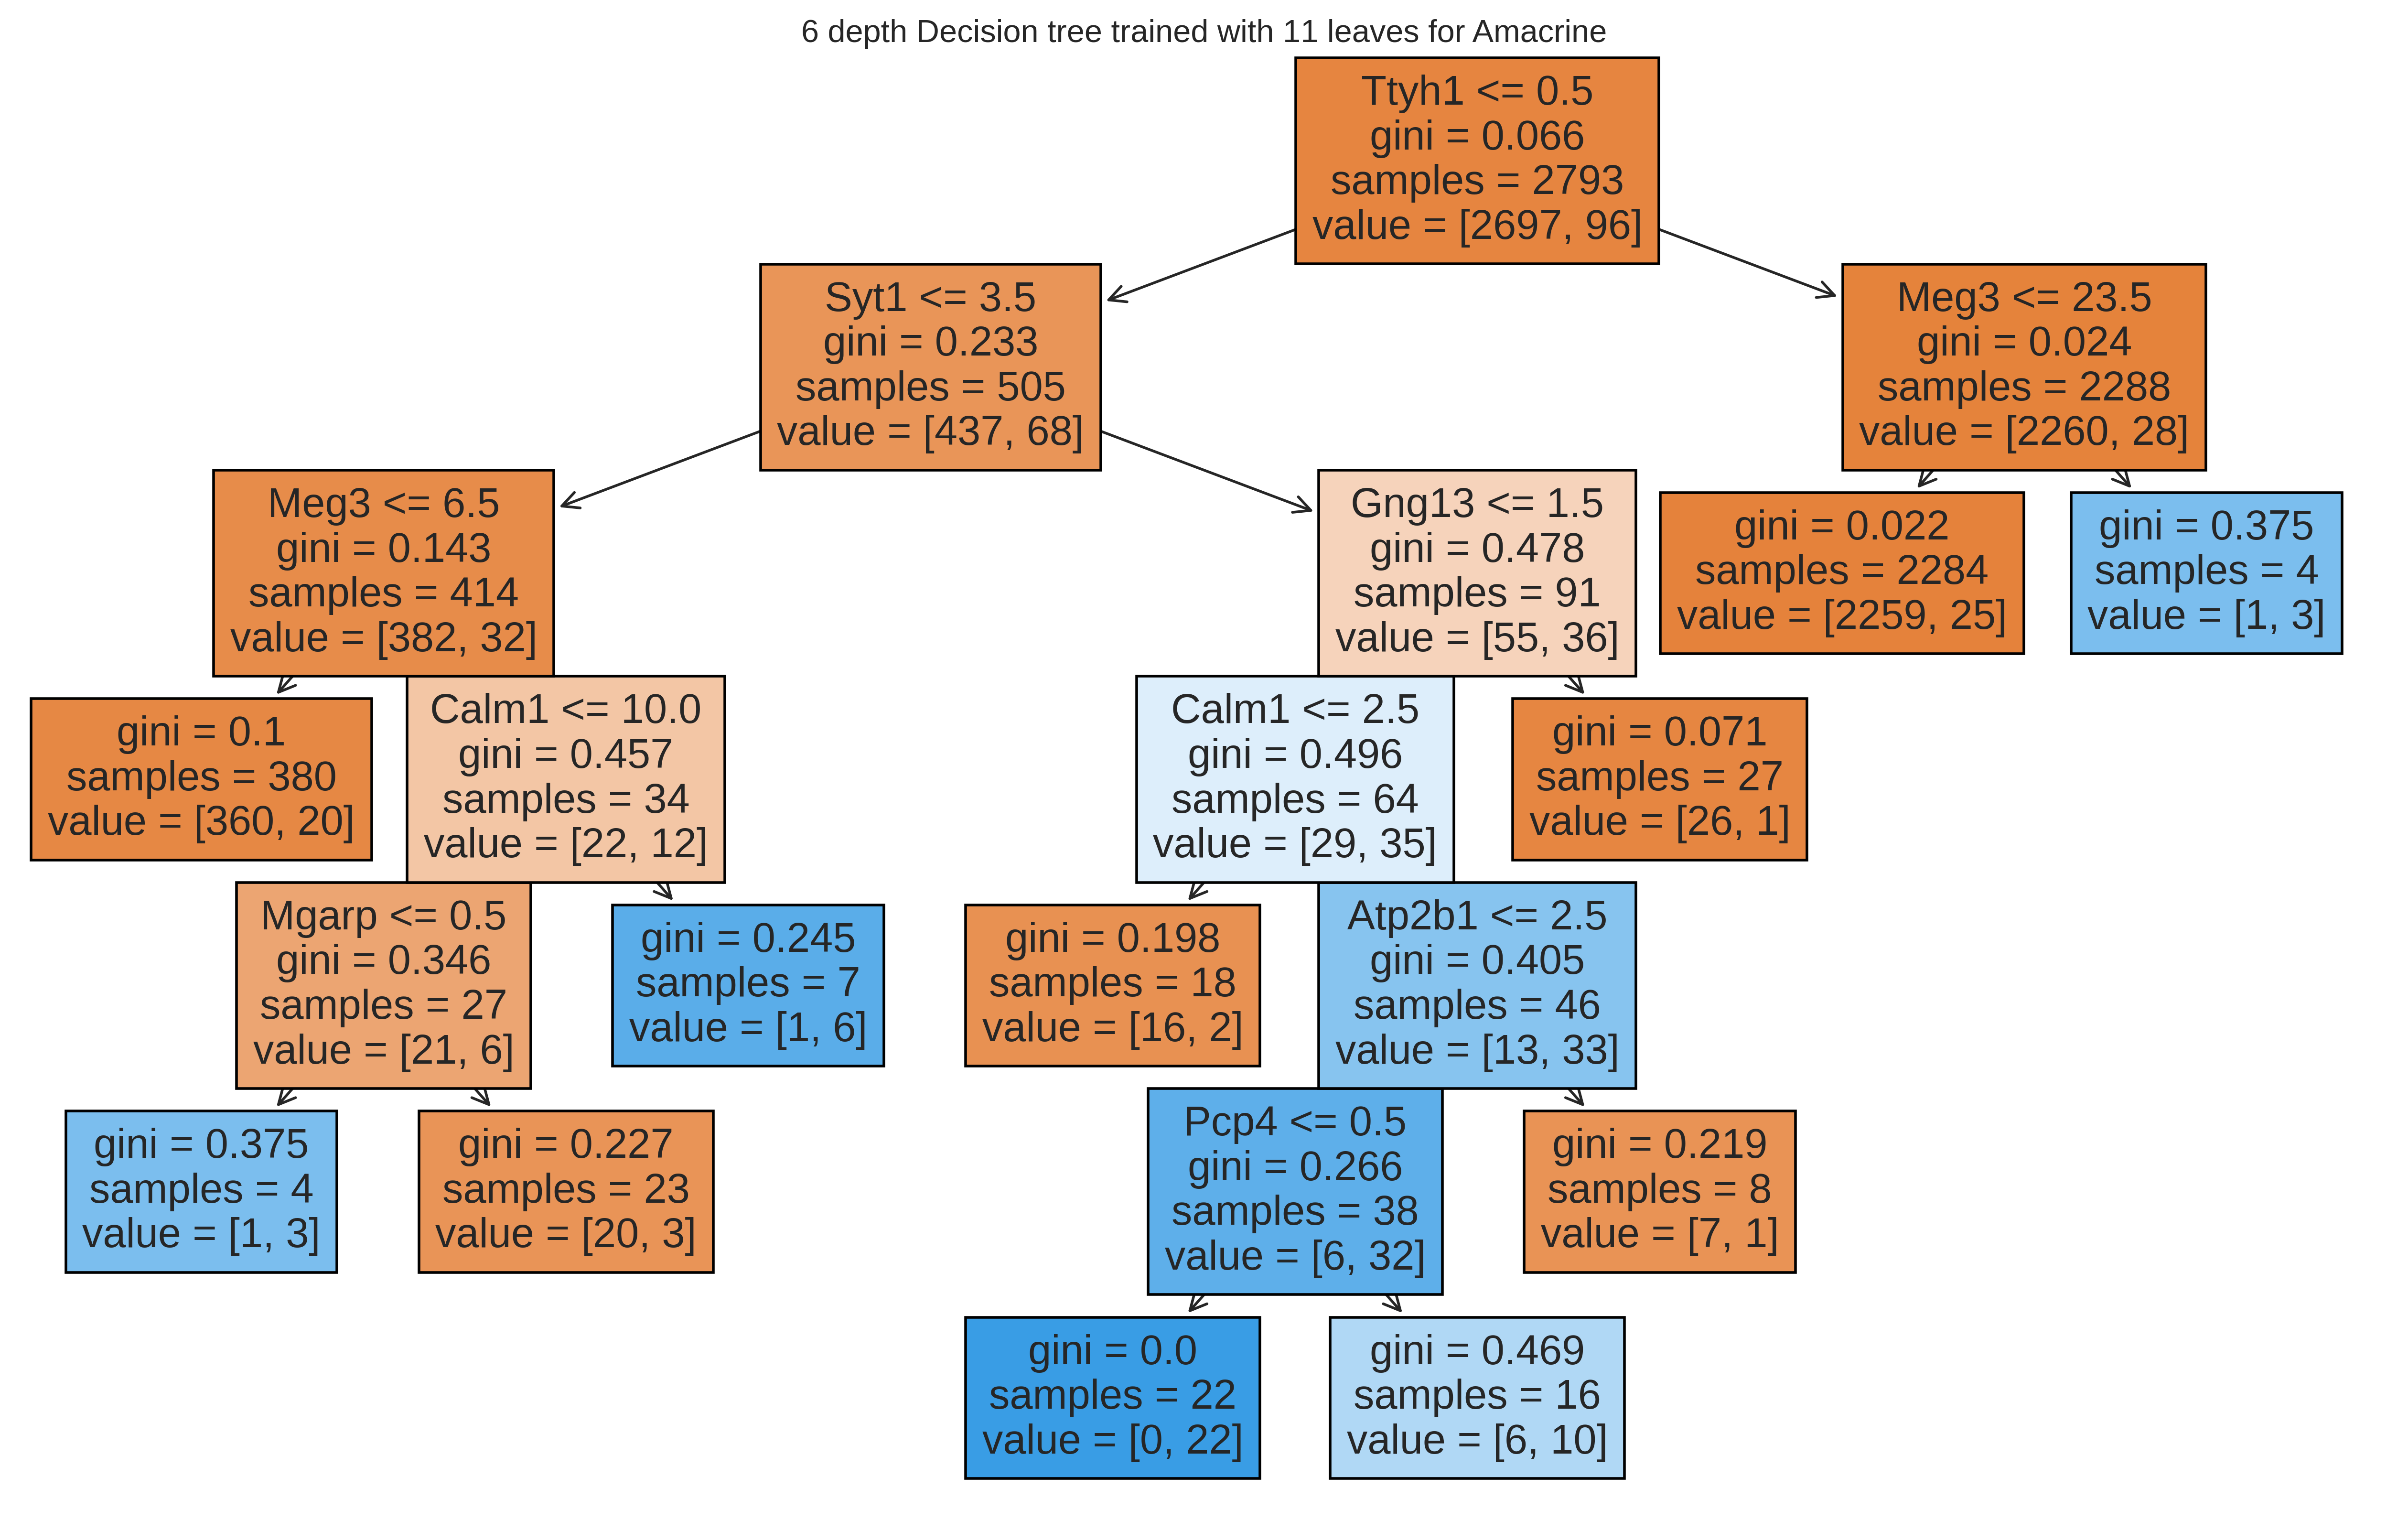

In [122]:
plt.figure(figsize=(16,10), dpi=400)
tree.plot_tree(dtc, filled=True, feature_names=X_train.columns)
plt.title("6 depth Decision tree trained with 11 leaves for Amacrine")
plt.show()

[Text(0.5, 1.0, 'feature importance for Amacrine decision tree ')]

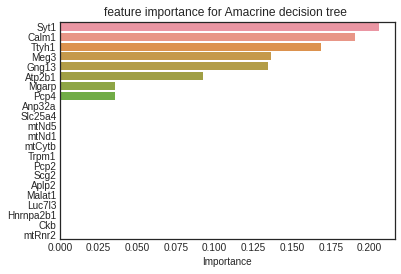

In [123]:
fi = pd.DataFrame(data=dtc.feature_importances_, index=X_train.columns, columns = ['Importance'])\
       .sort_values(by=['Importance'], ascending= False)

# And visualize
sns.barplot(data=fi, x="Importance", y=fi.index).set(title="feature importance for Amacrine decision tree ")

##Method 2 Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
hyperparameters = {'n_estimators': range(1,300,30),
                   'max_features': range(1,22)
                   }

rf_cv = GridSearchCV(RandomForestClassifier(random_state=0), 
                      hyperparameters,
                      cv= 10,
                      verbose = True,
                      n_jobs=-1)

# Execute the exhaustive search
rf_cv.fit(X_train, y_train)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


In [ ]:
print("Best params", rf_cv.best_params_)
# Evaluate with the test set for the best estimator
y_pred = rf_cv.best_estimator_.predict(X_test)

# Calculate performance metrics
print("Train/test accuracy: {}/{}".format(
      accuracy_score(rf_cv.best_estimator_.predict(X_train),y_train),
      accuracy_score(rf_cv.best_estimator_.predict(X_test),y_test),))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title("Amacrine RF confusion matrix with best parameters")

In [ ]:
rf_cv.cv_results_

{'mean_fit_time': array([0.00928698, 0.10933032, 0.21539061, 0.30898306, 0.4076581 ,
        0.50316591, 0.63062384, 0.7213501 , 0.79988687, 0.91194346,
        0.00932877, 0.12013245, 0.23875554, 0.34630253, 0.46044912,
        0.57392716, 0.68373928, 0.79026387, 0.90021091, 1.02109711,
        0.00941594, 0.135337  , 0.25547311, 0.38005846, 0.50259132,
        0.61896472, 0.73753924, 0.86791639, 0.99501233, 1.23471959,
        0.01052861, 0.14595323, 0.27659287, 0.4136528 , 0.54635954,
        0.68338218, 0.81294062, 0.95363295, 1.09273589, 1.23452678,
        0.01075132, 0.16071966, 0.31167605, 0.45429852, 0.60974226,
        1.02535181, 0.92167749, 1.04892309, 1.19281318, 1.34118941,
        0.01147511, 0.17703636, 0.33826711, 0.49944875, 0.65425916,
        0.8174926 , 0.98250835, 1.1340677 , 1.30532258, 1.45201147,
        0.01119936, 0.1897903 , 0.36670742, 0.53216584, 0.71414371,
        0.87885075, 1.06297271, 1.2336483 , 1.40514896, 1.59002843,
        0.01445255, 0.20415323,

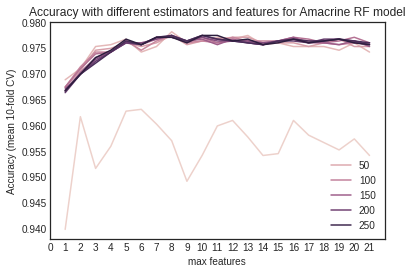

In [ ]:
plt.figure()
sns.lineplot(y= rf_cv.cv_results_["mean_test_score"], x=rf_cv.cv_results_['param_max_features'].data,hue=rf_cv.cv_results_['param_n_estimators']).set_xticks(range(22))
plt.xlabel("max features")
plt.ylabel("Accuracy (mean 10-fold CV)")
plt.title("Accuracy with different estimators and features for Amacrine RF model")
plt.show()

In [ ]:
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("R^2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred, squared=False))

MAPE 4837378761944.699
R^2 0.3716676790173451
MAE 0.021482277121374866
RMSE 0.14656833601216487


In [ ]:
rf = RandomForestClassifier(random_state=0,
    n_estimators = 31, 
    max_features = 8,
    oob_score = True) 


Text(0.5, 1.0, 'feature importance for Amacrine RF model')

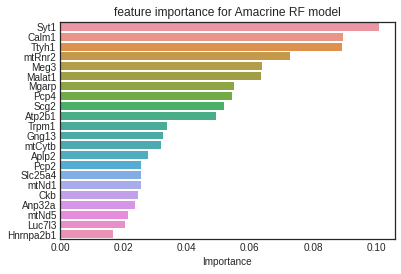

In [ ]:
rf.fit(X_train, y_train)
fi = pd.DataFrame(data=rf.feature_importances_, index=X_train.columns, columns = ['Importance'])\
       .sort_values(by=['Importance'], ascending= False)

# And visualize
sns.barplot(data=fi, x="Importance", y=fi.index).set_title("feature importance for Amacrine RF model")

In [ ]:
y_pred = rf.predict(X_test)
# Calculate performance metrics
print("--Test--")
print("R^2", r2_score(y_test, y_pred))
print("MSE",mean_squared_error(y_test, y_pred))

--Test--
R^2 0.3716676790173451
MSE 0.021482277121374866


##SVM 

###linear kernel

In [ ]:
pars = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
svc = GridSearchCV(SVC(kernel='linear', random_state=0), 
                   pars, cv=10, scoring='accuracy')
svc.fit(X_train, y_train)
print(svc.best_params_)

{'C': 0.1}


In [ ]:
print("Train/test accuracy: {}/{}".format(
      accuracy_score(svc.predict(X_train),y_train),
      accuracy_score(svc.predict(X_test),y_test),))

Train/test accuracy: 0.9878267096312209/0.9838882921589689


Text(0.5, 1.0, 'Amacrine SVM linear kernel confusion matrix with best parameters')

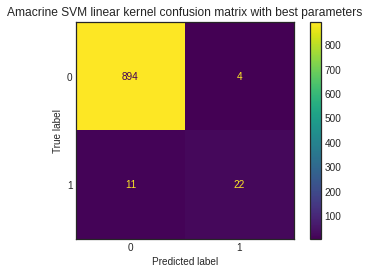

In [ ]:
cm = confusion_matrix(y_test,svc.predict(X_test))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title("Amacrine SVM linear kernel confusion matrix with best parameters")

Text(0.5, 1.0, 'feature importance for Amacrine SVM model with linear kernel')

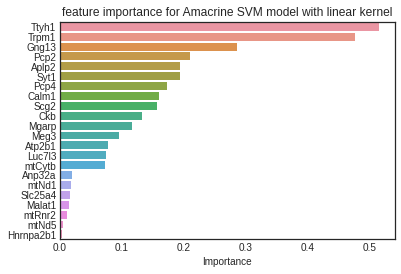

In [ ]:
# use the coeffient as the feature importance
fi = pd.DataFrame(data= abs(svc.best_estimator_.coef_).T, index=X_train.columns, columns = ['Importance'])\
       .sort_values(by=['Importance'], ascending= False)

# And visualize
sns.barplot(data=fi, x="Importance", y=fi.index).set_title("feature importance for Amacrine SVM model with linear kernel")

###rbf kernel

In [ ]:
pars = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
         'gamma': [0.5, 1, 2, 3, 4]}]

svc = GridSearchCV(SVC(kernel='rbf', random_state=0), 
                   pars, cv=10, scoring='accuracy')
svc.fit(X_train, y_train)
print(svc.best_params_)

{'C': 0.001, 'gamma': 0.5}


In [ ]:
print("Train/test accuracy (gamma={},C={}): {}/{}".format(
      svc.best_params_['gamma'], svc.best_params_['C'],
      accuracy_score(svc.predict(X_train),y_train),
      accuracy_score(svc.predict(X_test),y_test),))

Train/test accuracy (gamma=0.5,C=0.001): 0.9656283566058003/0.9645542427497314


Text(0.5, 1.0, 'Amacrine SVM rbf kernel confusion matrix with best parameters')

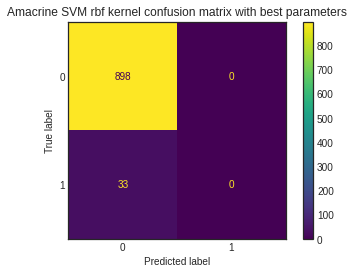

In [ ]:
cm = confusion_matrix(y_test,svc.predict(X_test))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title("Amacrine SVM rbf kernel confusion matrix with best parameters")

###poly kernel

In [ ]:
pars = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
         'degree': [2, 3, 4, 5]}]

svc = GridSearchCV(SVC(kernel='poly', random_state=0, gamma=1, coef0=1), 
                   pars, cv=10, scoring='accuracy')

svc.fit(X_train, y_train)
print(svc.best_params_)

{'C': 0.1, 'degree': 2}


In [ ]:
print("Train/test accuracy (degree={},C={}): {}/{}".format(
      svc.best_params_['degree'], svc.best_params_['C'],
      accuracy_score(svc.predict(X_train),y_train),
      accuracy_score(svc.predict(X_test),y_test),))

Train/test accuracy (degree=2,C=0.1): 1.0/0.9742212674543501


Text(0.5, 1.0, 'Amacrine SVM poly kernel confusion matrix with best parameters')

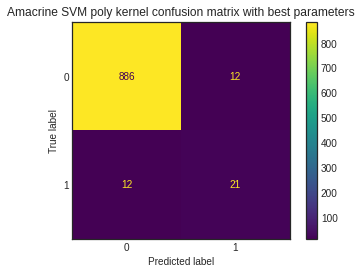

In [ ]:
cm = confusion_matrix(y_test,svc.predict(X_test))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title("Amacrine SVM poly kernel confusion matrix with best parameters")

#Regression

In [58]:
dataweek2=data.drop(data.columns[-2],axis=1)
y= dataweek2.Calm1


x = dataweek2.drop('Calm1', axis=1)
x = x.drop('CLASS', axis = 1)

# train, test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=3)

## Lasso Regression 

In [ ]:
lasso = Lasso(max_iter=10000) # Setting max_iter prevents ConvergenceWarning

# Try 100 lambdas ranging from 10000 down to 0.01 
lambdas = 10 ** np.linspace(6,-3,100)

# Initialize lists to store coefficients and intercepts
coefs, intercepts = [], []

for l in range(len(lambdas)):
    lasso.set_params(alpha=lambdas[l])
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)
    intercepts.append(lasso.intercept_)

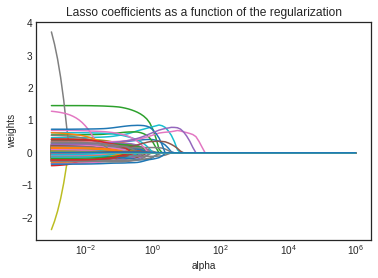

In [ ]:
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

Minimum CV MSE of 24.511912902560994 at lambda: 0.1 (index 77)


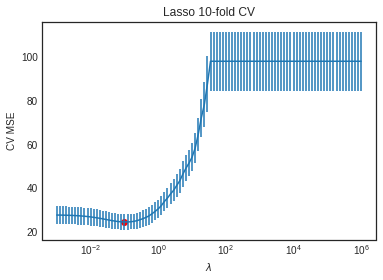

In [ ]:
mean_scores = np.zeros(len(lambdas))
std_scores = np.zeros(len(lambdas))

for i, lambda_ in enumerate(lambdas):
    cv = cross_val_score(
      Lasso(lambda_, max_iter=10000), 
      x_train, y_train, cv=10, scoring='neg_mean_squared_error'
    )
    mean_scores[i] = cv.mean()
    std_scores[i] = cv.std()
    
print("Minimum CV MSE of {} at lambda: {} (index {})".format(
    np.min(-mean_scores), 
    lambdas[np.argmin(-mean_scores)], 
    np.argmin(-mean_scores)
))

plt.errorbar(x=lambdas, y=-mean_scores, yerr=std_scores)
mn, opt = np.min(-mean_scores), np.argmin(-mean_scores)
plt.scatter(lambdas[opt],mn,c='red')
plt.xscale("log")
plt.xlabel('$\lambda$')
plt.ylabel('CV MSE')
plt.title('Lasso 10-fold CV')
plt.show()

In [ ]:
lasso.set_params(alpha=lambdas[np.argmin(-mean_scores)])
lasso.fit(x_train, y_train)
print('MSE on test set:', mean_squared_error(y_test, lasso.predict(x_test)))
print("R^2", r2_score(y_test, lasso.predict(x_test)))


## Decision Trees Regression

In [ ]:
# Create the regressor
dtr = DecisionTreeRegressor(max_depth=6)
# Fit it to the training set
dtr.fit(x_train, y_train)
# Evaluate with the test set
y_pred = dtr.predict(x_test)

# Calculate performance metrics
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("R^2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))


In [ ]:
# Lets first create a decision tree classifier
dt = DecisionTreeRegressor()
# Here is the hyperparameter space
hyperparameters = {'max_leaf_nodes': range(5,30, 3), 'max_features': range(4, 451, 50), 'max_depth':[6], 'random_state': [2] }

dt_cv = GridSearchCV(dt, hyperparameters,
                     cv= 10,
                     verbose = True)
 #Execute the exhastive search
dt_cv.fit(x_train, y_train)

print("Best hyperparameters", dt_cv.best_params_)

print("Best score",  dt_cv.best_score_)

In [ ]:
print("Best params", dt_cv.best_params_)
# Evaluate with the test set for the best estimator
y_pred_dt = dt_cv.best_estimator_.predict(x_test)

# Calculate performance metrics
print("R^2", r2_score(y_test, y_pred_dt))
print("MSE", mean_squared_error(y_test, y_pred_dt))


In [ ]:
# Add feature importance to a dataframe, together with the names of the columns. 
# Sort for convinience
fi = pd.DataFrame(data=dt_cv.best_estimator_.feature_importances_
, index=x_train.columns, columns = ['Importance'])\
       .sort_values(by=['Importance'], ascending= False)
dt_imp = fi.head(20)

In [ ]:
sns.barplot(data=dt_imp, x="Importance", y=dt_imp.index)
plt.title('DT top 20 Important varibale')

## Random Forest Regression

In [59]:
 # This takes too long, this is why we reduced the space quite a lot
hyperparameters = {'n_estimators': [50, 200],
                   'max_features': range(4, 451, 50)
                   }

btr_cv = GridSearchCV(RandomForestRegressor(), 
                      hyperparameters,
                      cv= 10,
                      verbose = True,
                      n_jobs=-1)

# Execute the exhaustive search
rf_fit = btr_cv.fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [62]:
print("Best params", btr_cv.best_params_)
# Evaluate with the test set for the best estimator
y_pred = btr_cv.best_estimator_.predict(x_test)

# Calculate performance metrics
print("R^2", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))


Best params {'max_features': 254, 'n_estimators': 200}
R^2 0.7432147823364144
MSE 23.125059452201935


In [63]:
# Add feature importance to a dataframe, together with the names of the columns. 
# Sort for convinience
fi = pd.DataFrame(data=rf_fit.best_estimator_.feature_importances_
, index=x_train.columns, columns = ['Importance'])\
       .sort_values(by=['Importance'], ascending= False)



In [64]:
rf_imp = fi.head(20)

Text(0.5, 1.0, 'RF important features')

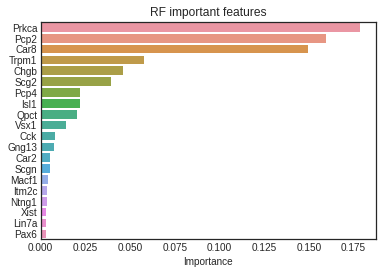

In [65]:
sns.barplot(data=rf_imp, x="Importance", y=rf_imp.index)
plt.title('RF important features')

In [76]:
rf_import_corr = dataweek1.loc[:,['Calm1', 'Prkca','Pcp2', 'Car8', 'Trpm1']]
rf_import_corr= rf_import_corr.corr()
rf_import_corr


,Calm1,Prkca,Pcp2,Car8,Trpm1
Calm1,1.000000,0.563857,0.610573,0.639947,0.631252
Prkca,0.563857,1.000000,0.561274,0.527603,0.480252
Pcp2,0.610573,0.561274,1.000000,0.572209,0.487538
Car8,0.639947,0.527603,0.572209,1.000000,0.481873
Trpm1,0.631252,0.480252,0.487538,0.481873,1.000000


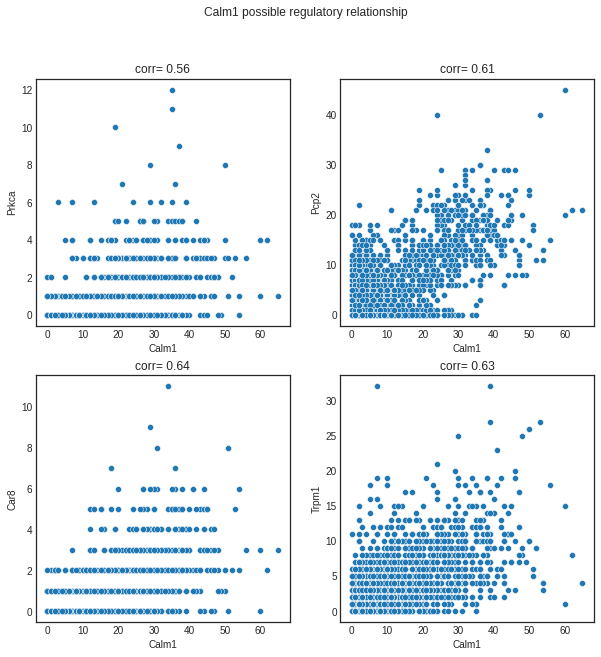

In [97]:
# examine possible regulatory relationship
imp_genes = rf_imp.index[0:4]
axis = [[0,0], [0,1],\
        [1,0], [1,1]]
corr_ind = 1 
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, j in zip(imp_genes, axis):
  #print(f'corr:{rf_import_corr.iloc[0, corr_ind]:.2f}')
  sns.scatterplot('Calm1', i, ax = axes[j[0],j[1]], data=dataweek1)
  axes[j[0],j[1]].set_title(f'corr= {rf_import_corr.iloc[0, corr_ind]:.2f}')
  corr_ind +=1 
fig.suptitle('Calm1 possible regulatory relationship')
plt.show()

#Advanced analysis

##KNN with cell type to compare with last week

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
cell_type_data=data.drop(data.columns[-1],axis=1)

In [100]:
cell_type_data["CELLTYPE"].unique()

array(['BC6', 'BC3B', 'BC3A', 'BC7', 'Rod BC', 'BC2', 'BC4', 'Amacrine_2',
       'Amacrine_1'], dtype=object)

In [101]:
cell_type_data["Celltype"]=cell_type_data["CELLTYPE"].map({'BC6':1, 'BC3B':2, 'BC3A':3, 'BC7':4, 'Rod BC':5, 'BC2':6, 'BC4':7, 'Amacrine_2':8,
       'Amacrine_1':9}).astype(int)

In [102]:
columns=cell_type_data.columns[:-2]
x_ad=cell_type_data[columns].values
y_ad=cell_type_data["Celltype"].values
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(x_ad, y_ad, random_state=1,test_size=0.25)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_ad,y_train_ad)

KNeighborsClassifier(n_neighbors=3)

Predicted    1    2   3    4    5   6   7  8  9
True                                           
1          157    1   2    4    5   8   0  0  0
2            6  148   1    1    0   1   8  1  0
3            3   10  79    0    1   0   0  1  0
4           11    3   3  165    0   0   0  0  0
5            1    1   0    0  116   0   0  0  0
6           11    4   1    3    0  71   1  0  0
7            0   26   1    0    0   0  43  0  0
8            2    0   1    0    1   3   0  7  0
9            1    2   0    2    0   2   0  6  6


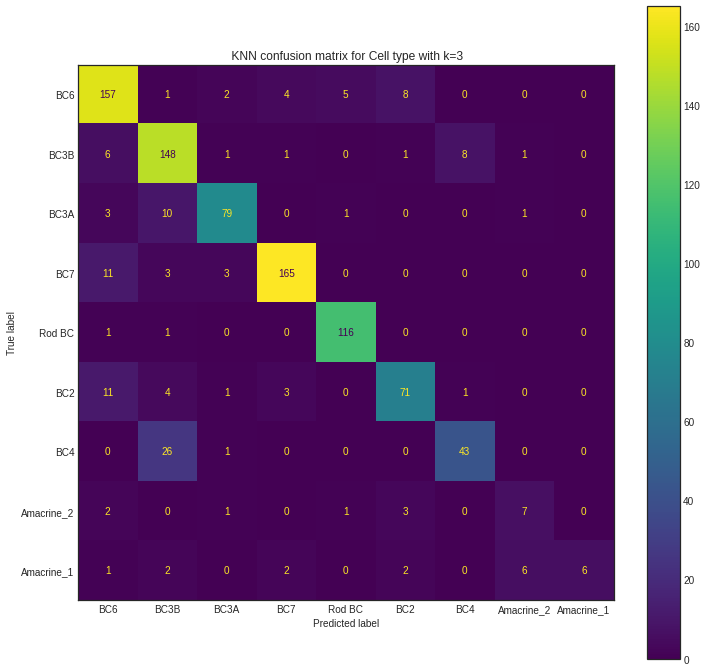

In [103]:
ypred_test_ad=knn.predict(X_test_ad)
conf_m = confusion_matrix(y_test_ad, ypred_test_ad, labels=knn.classes_)
conf_pd = pd.DataFrame(conf_m,index=knn.classes_, columns=knn.classes_)
conf_pd.index.name = 'True'
conf_pd.columns.name = 'Predicted'
print(conf_pd)

fig, ax = plt.subplots(figsize=(12, 12))
conf_m_display = ConfusionMatrixDisplay(conf_m,display_labels=['BC6', 'BC3B', 'BC3A', 'BC7', 'Rod BC', 'BC2', 'BC4', 'Amacrine_2','Amacrine_1'] ).plot(ax=ax)

plt.title(" KNN confusion matrix for Cell type with k=3")
plt.show()

In [104]:
print("accuracy: {}".format(accuracy_score(y_test_ad, ypred_test_ad)))

accuracy: 0.8506981740064447


##Decision tree

In [105]:
x_ad=cell_type_data[columns]
y_ad=cell_type_data["Celltype"]
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(x_ad, y_ad, random_state=1,test_size=0.25)

In [107]:
# Lets first create a decision tree classifier
dt = DecisionTreeClassifier(random_state=0)
# Here is the hyperparameter space
hyperparameters = {'max_leaf_nodes': range(5,452)}

dt_cv = GridSearchCV(dt, hyperparameters,
                     cv= 10,
                     verbose = True)
# Execute the exhastive search
dt_cv.fit(X_train_ad, y_train_ad)

print("Best hyperparameters", dt_cv.best_params_)
print("Best score",  dt_cv.best_score_)

Fitting 10 folds for each of 447 candidates, totalling 4470 fits
Best hyperparameters {'max_leaf_nodes': 52}
Best score 0.8907923707117256


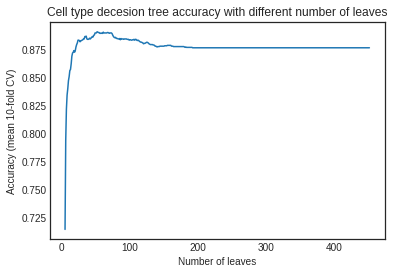

In [108]:
plt.figure()
sns.lineplot(y= dt_cv.cv_results_["mean_test_score"], x=dt_cv.cv_results_['param_max_leaf_nodes'].data)
plt.xlabel("Number of leaves")
plt.ylabel("Accuracy (mean 10-fold CV)")
plt.title("Cell type decesion tree accuracy with different number of leaves")
plt.show()

Accuracy: 0.9001074113856069


Text(0.5, 1.0, 'Cell type confusion matrix with best parameters of decision tree ')

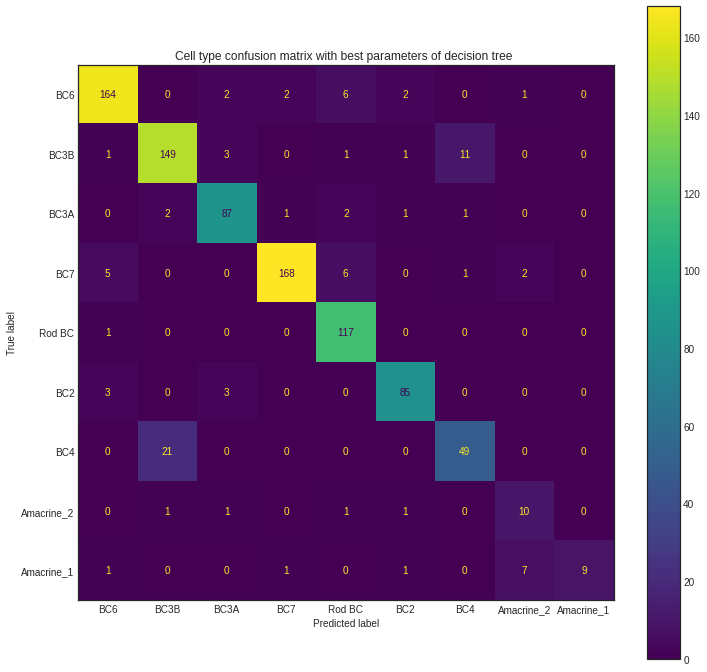

In [109]:
# Create Decision Tree classifer object
dtc_ad = DecisionTreeClassifier(max_leaf_nodes=52,random_state=0)
# Train with the training dataset
dtc_ad.fit(X_train_ad,y_train_ad)

#Predict the response for test dataset
y_pred_ad = dtc_ad.predict(X_test_ad)
print("Accuracy:", accuracy_score(y_test_ad, y_pred_ad))

fig, ax = plt.subplots(figsize=(12, 12))
cm_ad = confusion_matrix(y_test_ad, y_pred_ad)
cm_display = ConfusionMatrixDisplay(cm_ad,display_labels=['BC6', 'BC3B', 'BC3A', 'BC7', 'Rod BC', 'BC2', 'BC4', 'Amacrine_2','Amacrine_1']).plot(ax=ax)
plt.title("Cell type confusion matrix with best parameters of decision tree ")

In [110]:
X_train_ad

,Acin1,Actb,Agap1,Ahi1,Akap11,Akap9,Aldoa,Aldoc,Ankrd12,Anp32a,...,Zfr,Zranb2,mtCo1,mtCytb,mtNd1,mtNd2,mtNd4,mtNd5,mtRnr1,mtRnr2
1316,1,0,0,0,0,0,1,0,0,0,...,0,0,0,9,2,2,3,1,0,3
3631,0,2,0,0,0,0,0,1,3,1,...,2,0,0,3,1,0,2,1,1,23
2929,0,2,0,0,0,1,3,1,2,1,...,1,0,1,8,5,1,6,2,0,8
2361,0,1,0,0,0,0,1,0,2,5,...,1,1,3,5,5,2,2,5,0,10
1143,2,0,0,0,3,2,1,1,0,0,...,0,0,1,4,5,1,3,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,0,1,2,0,0,0,5,0,0,0,...,2,0,1,1,5,0,0,3,0,6
905,0,1,0,0,0,0,0,1,2,1,...,1,0,1,3,2,1,1,0,1,10
1096,1,0,0,0,0,0,2,1,0,0,...,1,0,0,4,3,0,2,0,1,13
235,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,5,1,0,7


Text(0.5, 1.0, 'Feature importance for cell type with decision tree')

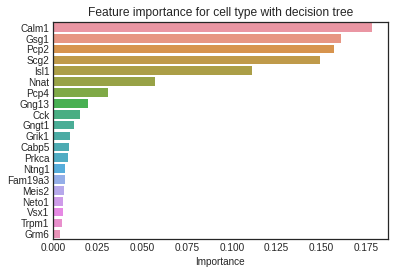

In [111]:

fi = pd.DataFrame(data=dtc_ad.feature_importances_, index=X_train_ad.columns, columns = ['Importance'])\
       .sort_values(by=['Importance'], ascending= False)
fi=fi.head(20)
# And visualize
sns.barplot(data=fi, x="Importance", y=fi.index).set_title("Feature importance for cell type with decision tree")